In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import itertools

/var/folders/jx/cmk_mkc16c99zr1hg6mytzkm0000gn/T/ipykernel_97021/1071757538.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=ax,x="reg_method", y="mutual_information", data=scores, palette=palette, dodge=False, alpha=.6)


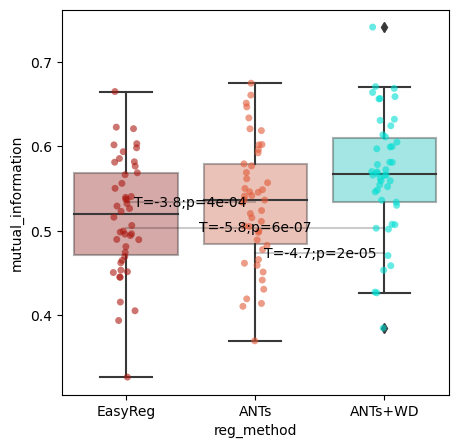

In [2]:
root_path = os.path.dirname(os.path.abspath("Figure-5.ipynb"))
scores = pd.read_csv(os.path.join(os.path.dirname(root_path), 'figure_3a', 'Figure-3a.csv'))
reg_methods = ['EasyReg', 'ANTs', 'ANTs+WD']
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
palette = {"ANTs":"#E25A38", "ANTs+WD":"#00DED3", "EasyReg":"#AB1911"}
j=0
sns.boxplot(ax=ax,x="reg_method", y="mutual_information", data=scores, palette=palette, boxprops={'alpha': 0.4})
sns.stripplot(ax=ax,x="reg_method", y="mutual_information", data=scores, palette=palette, dodge=False, alpha=.6)
for r1,r2 in itertools.combinations(reg_methods, r=2):
    x1 = scores.loc[scores.reg_method==r1, "mutual_information"]
    x2 = scores.loc[scores.reg_method==r2, "mutual_information"]
    res = stats.ttest_rel(x1, x2)
    text_kwargs = dict(ha='center', va='center', fontsize=10, color='black')
    ax.plot([reg_methods.index(r1), reg_methods.index(r2)], [j+np.mean(ax.get_ylim())]*2, '-k', alpha=0.2)
    ax.text(np.mean([reg_methods.index(r1), reg_methods.index(r2)]), j+np.mean(ax.get_ylim()), 'T=%.1f;p=%.0e'%(res.statistic, res.pvalue), **text_kwargs)
    j-=ax.get_ylim()[1]/25
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-5a.svg'))

/var/folders/jx/cmk_mkc16c99zr1hg6mytzkm0000gn/T/ipykernel_97021/2508791853.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, dodge=False, alpha=.6)


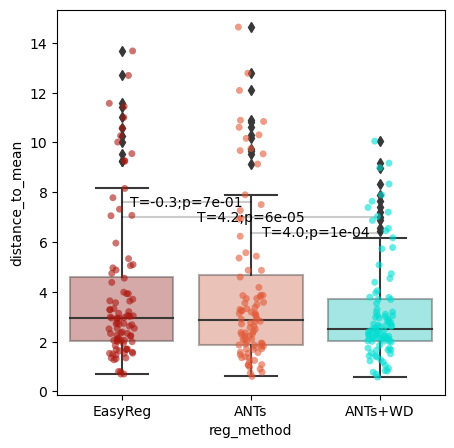

In [3]:
scores = pd.read_csv(os.path.join(os.path.dirname(root_path), 'figure_3b', 'Figure-3b.csv'))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
palette = {"ANTs":"#E25A38", "ANTs+WD":"#00DED3", "EasyReg":"#AB1911"}
j=0
sns.boxplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, boxprops={'alpha': 0.4})
sns.stripplot(ax=ax,x="reg_method", y="distance_to_mean", data=scores, palette=palette, dodge=False, alpha=.6)
for r1,r2 in itertools.combinations(reg_methods, r=2):
    x1 = scores.loc[scores.reg_method==r1, "distance_to_mean"]
    x2 = scores.loc[scores.reg_method==r2, "distance_to_mean"]
    res = stats.ttest_rel(x1, x2)
    text_kwargs = dict(ha='center', va='center', fontsize=10, color='black')
    ax.plot([reg_methods.index(r1), reg_methods.index(r2)], [j+np.mean(ax.get_ylim())]*2, '-k', alpha=0.2)
    ax.text(np.mean([reg_methods.index(r1), reg_methods.index(r2)]), j+np.mean(ax.get_ylim()), 'T=%.1f;p=%.0e'%(res.statistic, res.pvalue), **text_kwargs)
    j-=ax.get_ylim()[1]/25
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-5b.svg'))

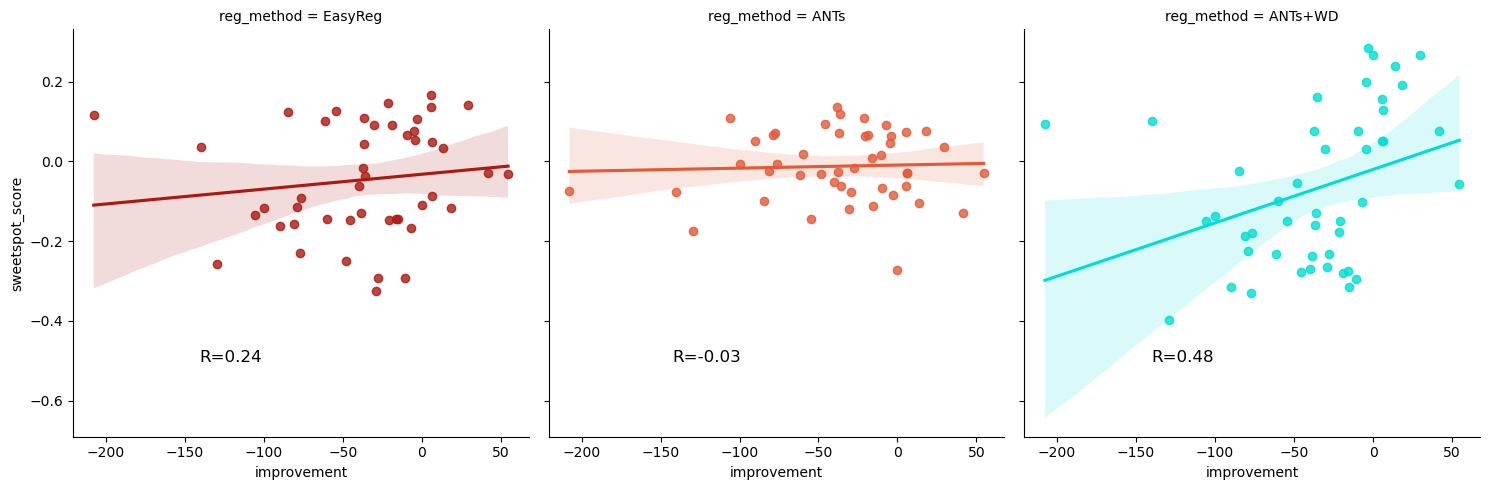

In [4]:
scores = pd.read_csv(os.path.join(os.path.dirname(root_path), 'figure_4', 'Figure-4.csv'))
g = sns.lmplot(x="improvement", y="sweetspot_score", hue="reg_method",col="reg_method", data=scores, palette=palette)
axes = g.axes
for j,reg_method in enumerate(reg_methods):
    x1 = scores.loc[scores.reg_method==reg_method, 'improvement']
    x2 = scores.loc[scores.reg_method==reg_method, 'sweetspot_score']
    res = stats.spearmanr(x1, x2, nan_policy='omit')
    text_kwargs = dict(ha='center', va='center', fontsize=12, color='black')
    axes[0,j].text(axes[0,j].get_xlim()[0]+100, axes[0,j].get_ylim()[0]+0.2, 'R=%.2f'%(res.statistic), **text_kwargs)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(os.path.join(root_path, 'Figure-5c.svg'))